In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\utkar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
df = pd.read_csv("sentiment_data.csv")
print("Sample Data:")
print(df.head())

Sample Data:
                                         text sentiment
0  This is the best product I have ever used!  positive
1   Absolutely horrible, would not recommend.  negative
2    It's okay, not great but not bad either.   neutral
3         Loved it! Exceeded my expectations.  positive
4                Worst experience of my life.  negative


In [9]:
def clean_text(text):
    text = re.sub(r"http\\S+|www\\S+|https\\S+", '', text)
    text = re.sub(r'\\@\\w+|\\#', '', text)
    text = re.sub(r'[^A-Za-z\\s]', '', text)
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

df['cleaned_text'] = df['text'].apply(clean_text)

C:\Users\utkar\AppData\Local\Temp\ipykernel_11560\2204232434.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='Set2')


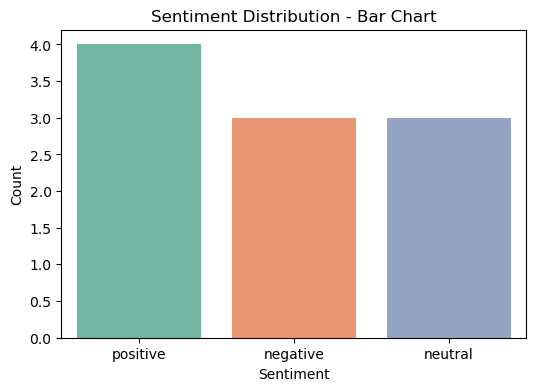

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df, palette='Set2')
plt.title("Sentiment Distribution - Bar Chart")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


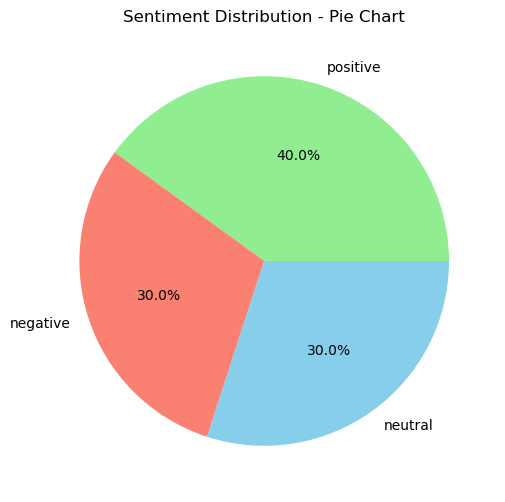

In [13]:
plt.figure(figsize=(6, 6))
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'salmon', 'skyblue'])
plt.title("Sentiment Distribution - Pie Chart")
plt.ylabel("")
plt.show()

In [15]:
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['cleaned_text']).toarray()
y = df['sentiment']


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [19]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [21]:
y_pred = model.predict(X_test)

In [23]:
print("Model Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Model Accuracy: 33.33%

Classification Report:

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         1
     neutral       0.00      0.00      0.00         1
    positive       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3



C:\Users\utkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\utkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\utkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


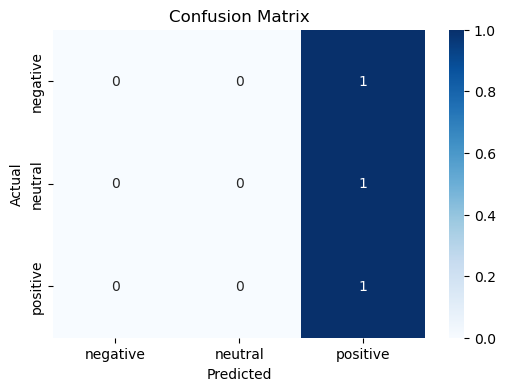

In [25]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
